## We always use the eigenvalues, but is there information to be gleened from the eigenvectors?

In [1]:
import splitting as s
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def _grideig(data, maxlag=None, window=None, stepang=None, steplag=None):

    # set some defaults
    if maxlag is None:
        maxlag = int(data[0].size / 10)
        maxlag = maxlag if maxlag%2==0 else maxlag + 1
    if steplag is None:
        steplag = 2 * int(np.max([1,maxlag/80]))
    if stepang is None:
        stepang = 2
    if window is None:
        # by default whatevers smaller,
        # half trace length or 10 * max shift
        # ensure window is odd length
        window = int(np.min([data.shape[1] * 0.5,maxlag * 10]))
        window = window if window%2==1 else window + 1

    degs, lags = np.meshgrid(np.arange(0,180,stepang),
                             np.arange(0,maxlag,steplag).astype(int))

    shape = degs.shape
    lam1 = np.zeros(shape)
    lam2 = np.zeros(shape)
    vec1 = np.zeros(shape)
    for ii in np.arange(shape[1]):
        temp = s.rotate(data,degs[0,ii])
        for jj in np.arange(shape[0]):
            # remove splitting so use inverse operator (negative lag)
            temp2 = s.lag(temp,-lags[jj,ii])
            temp3 = s.window(temp2,window)
            eigenValues, eigenVectors = np.linalg.eig(np.cov(temp3))
            # which is big?
            idx = eigenValues.argsort()[::-1]   
            eigenValues = eigenValues[idx]
            eigenVectors = eigenVectors[:,idx]
            lam1[jj,ii], lam2[jj,ii] = eigenValues
            vec1[jj,ii] = np.rad2deg(np.arctan2(eigenVectors[1,0],eigenVectors[0,0]))
                      
    return data,degs,lags,lam1,lam2,vec1,window

In [44]:
data,degs,lags,lam1,lam2,vec1,window = _grideig(s.split(s.synth(),30,20))

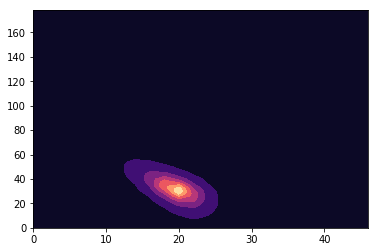

In [45]:
plt.contourf(lags,degs,lam1/lam2,cmap='magma')
plt.show()

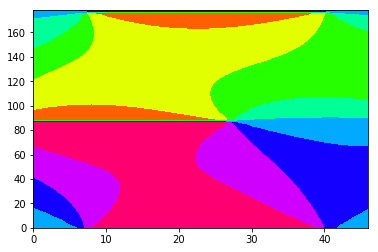

In [46]:
plt.contourf(lags,degs,vec1,cmap='hsv')
plt.show()

In [22]:
M = s.eigval.grideigval(s.synth())

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


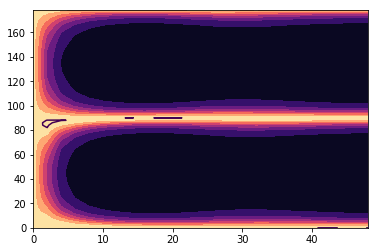

In [23]:
M.plot()